# Berkeley DBT
### A mental health chatbot
Hector Rincon | Robert Mueller | John Van | Andrew Loeber

## Imports

In [29]:
# General imports
import numpy as np
import pandas as pd
import pickle
import os
import logging
from openai import AzureOpenAI
import time
import tiktoken
from dotenv import load_dotenv
import sys
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
sys.path.append(os.path.join(sys.path[0], '..'))

# DBT imports
from utils.openai_api import get_openai_response, get_openai_response_content
from evaluation.evaluation_pipeline import run_evaluations
from evaluation.skill_presence_evaluation import DBTSkills

## Generate Conversations
- Run generate_conversations.py in the command line

In [2]:
os.environ['OPENAI_API_KEY'] = '12858f5908ee4b17b986977b35d604dd'
os.environ['MODEL_DEPLOYMENT'] = 'gpt4-1106'
os.environ['OAI_ENDPOINT'] = 'dbt-openai-usea2-assistants'
#logging.basicConfig(level=logging.DEBUG)

## Evaluations

In [3]:
# Read in conversations pickle file
convo_dict = {}
for key, value in pd.read_pickle('./convo_generation/output/20240306_convos_full.pickle').items():
    convo_dict[value['id']] = value['result']['eval_messages']

# Create csv to run evaluations on
convo_df = pd.DataFrame([convo_dict]).T.reset_index().rename(columns={'index': 'conversation_id', 0: 'conversation'})
convo_df.to_csv('./convo_generation/output/20240306_convos_full.csv')

### Adherence

In [6]:
# run_evaluations expects a csv with the following format in each row: {id, text conversation]

run_evaluations('./convo_generation/output/20240306_convos_full.csv', './evaluation/output/20240306_adherence_results.json', 'adherence')

2024-03-29 16:02:38,785 - evaluation_pipeline - INFO: Running conversation: (1/81)
2024-03-29 16:02:38,785 - adherence_evaluation - INFO: Running iteration 0
2024-03-29 16:02:38,786 - adherence_evaluation - INFO: Running criterion: Organize by Targets (1/23)
2024-03-29 16:02:39,550 - adherence_evaluation - INFO: Running criterion: Emotion Focus (2/23)
2024-03-29 16:02:40,161 - adherence_evaluation - INFO: Running criterion: Describe Specifically (3/23)
2024-03-29 16:02:40,675 - adherence_evaluation - INFO: Running criterion: Chain Analysis (4/23)
2024-03-29 16:02:41,312 - adherence_evaluation - INFO: Running criterion: Teach New Information (5/23)
2024-03-29 16:02:41,799 - adherence_evaluation - INFO: Running criterion: Generate Solutions (6/23)
2024-03-29 16:02:42,269 - adherence_evaluation - INFO: Running criterion: Activate New Behavior (7/23)
2024-03-29 16:02:43,237 - adherence_evaluation - INFO: Running criterion: Provide Coaching Feedback (8/23)
2024-03-29 16:02:43,754 - adherenc

In [2]:
adherence_results = './evaluation/output/20240306_adherence_results.json'
with open(adherence_results) as adherence_results_json:
    adherence_results_dict = json.load(adherence_results_json)

# converting json dataset from dictionary to dataframe
adherence_results_df = pd.DataFrame(columns = ['conversation_id', 'criterion', 'score'])
for item in adherence_results_dict:
    for r, v in item['result'].items():
        adherence_results_df.loc[len(adherence_results_df)] = {'conversation_id': item['conversation_id'], 'criterion': r, 'score': v}

In [3]:
adherence_results_df

,conversation_id,criterion,score
0,bc97e560-2f17-40c6-bbbc-cf1455e5536b,Organize by Targets,1.0
1,bc97e560-2f17-40c6-bbbc-cf1455e5536b,Emotion Focus,1.0
2,bc97e560-2f17-40c6-bbbc-cf1455e5536b,Describe Specifically,1.0
3,bc97e560-2f17-40c6-bbbc-cf1455e5536b,Chain Analysis,0.0
4,bc97e560-2f17-40c6-bbbc-cf1455e5536b,Teach New Information,1.0
...,...,...,...
1858,feed36a3-d156-49b7-8f8d-d174472daa0d,Direct Confrontation,0.4
1859,feed36a3-d156-49b7-8f8d-d174472daa0d,Unorthodox Irreverence,1.0
1860,feed36a3-d156-49b7-8f8d-d174472daa0d,Balanced Style and Strategies,1.0
1861,feed36a3-d156-49b7-8f8d-d174472daa0d,Model Dialectical Thinking,0.8


### Skill Presence

In [2]:
run_evaluations('./convo_generation/output/20240306_convos_full.csv', './evaluation/output/20240306_skill_presence_results.json', 'skill_presence')

2024-04-03 00:40:00,706 - skill_presence_evaluation - INFO: Launching skill presence evaluation with following skill ids: ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'IE1', 'IE2', 'IE3', 'IE4', 'IE5', 'IE6', 'IE7', 'IE8', 'IE9', 'IE10', 'IE11', 'ER1', 'ER2', 'ER3', 'ER4', 'ER5', 'ER6', 'ER7', 'ER8', 'ER9', 'ER10', 'DT1', 'DT2', 'DT3', 'DT4', 'DT5', 'DT6', 'DT7', 'DT8', 'DT9', 'DT10', 'DT11', 'DT12', 'DT13', 'DT14', 'DT15', 'DT16']
2024-04-03 00:40:00,706 - evaluation_pipeline - INFO: Running conversation: (1/81)
2024-04-03 00:40:00,709 - evaluation_pipeline - INFO: Running conversation: (2/81)
2024-04-03 00:40:00,713 - evaluation_pipeline - INFO: Running conversation: (3/81)
2024-04-03 00:40:00,715 - evaluation_pipeline - INFO: Running conversation: (4/81)
2024-04-03 00:40:00,717 - evaluation_pipeline - INFO: Running conversation: (5/81)
2024-04-03 00:40:00,720 - evaluation_pipeline - INFO: Running conversation: (6/81)
2024-04-03 00:40:00,723 - evaluation_pipeline - INFO: Ru

In [2]:
skill_presence_results = './evaluation/output/20240306_skill_presence_results.json'
with open(skill_presence_results) as skill_presence_results_json:
    skill_presence_results_dict = json.load(skill_presence_results_json)

In [3]:
skill_presence_results_dict

[{'conversation_id': 'bc97e560-2f17-40c6-bbbc-cf1455e5536b',
  'evaluation_name': 'Skill Presence',
  'result': ['DT3']},
 {'conversation_id': '817c2b6f-51bf-401c-8b06-cdf9f83b5948',
  'evaluation_name': 'Skill Presence',
  'result': []},
 {'conversation_id': 'a26af177-cf8b-41f0-b286-3a1f536544af',
  'evaluation_name': 'Skill Presence',
  'result': []},
 {'conversation_id': '4f57e28b-1c11-437c-a067-a725c3b3dd32',
  'evaluation_name': 'Skill Presence',
  'result': ['M8']},
 {'conversation_id': '8ad366a9-643d-4a93-8716-f7df4447d79e',
  'evaluation_name': 'Skill Presence',
  'result': ['IE2']},
 {'conversation_id': 'b652dc24-20e4-413c-b2b0-e9729d7d5c8c',
  'evaluation_name': 'Skill Presence',
  'result': ['M8']},
 {'conversation_id': '9c8ef3c4-2935-4ca8-b4a6-16984ae499be',
  'evaluation_name': 'Skill Presence',
  'result': ['ER7']},
 {'conversation_id': '011948a4-a9e8-4259-85b3-e2e50fd42e83',
  'evaluation_name': 'Skill Presence',
  'result': ['DT3']},
 {'conversation_id': 'c2289ef0-41ba-

In [4]:
# converting json dataset from dictionary to dataframe
skills_detected_df = pd.DataFrame.from_records(
    skill_presence_results_dict
).set_index('conversation_id'
).drop(
    'evaluation_name',
    axis=1,
).rename(
    {'result': 'detected_skill_ids'},
    axis=1,
)

skills_detected_df

,detected_skill_ids
conversation_id,
bc97e560-2f17-40c6-bbbc-cf1455e5536b,[DT3]
817c2b6f-51bf-401c-8b06-cdf9f83b5948,[]
a26af177-cf8b-41f0-b286-3a1f536544af,[]
4f57e28b-1c11-437c-a067-a725c3b3dd32,[M8]
8ad366a9-643d-4a93-8716-f7df4447d79e,[IE2]
...,...
1551bb94-6070-498f-a011-9407ed545c45,[IE2]
6ac0e128-495a-4244-b60e-642e11cca7ea,[IE3]
711d32a0-4594-498f-9a2b-5f93f2346da7,[DT7]


In [5]:
prompts_df = pd.read_csv(
    './data/prompts_with_ids.tsv',
    delimiter='\t',
).rename(
    {
        'Initial Message':  'initial_message',
        'Target Skill IDs': 'target_skill_ids',
        'id':               'conversation_id',
    },
    axis=1,
).set_index(
    'conversation_id'
)
prompts_df['target_skill_ids'] = prompts_df['target_skill_ids'].apply(ast.literal_eval)
prompts_df

,initial_message,target_skill_ids
conversation_id,,
bc97e560-2f17-40c6-bbbc-cf1455e5536b,My grandmother passed away two days ago and ev...,[M1]
817c2b6f-51bf-401c-8b06-cdf9f83b5948,I have a hard time falling asleep at night. I ...,[M2]
a26af177-cf8b-41f0-b286-3a1f536544af,I have been ruminating before falling asleep a...,"[M3, ER8]"
4f57e28b-1c11-437c-a067-a725c3b3dd32,"Oftentimes when I'm with my friends, I am sitt...",[M4]
8ad366a9-643d-4a93-8716-f7df4447d79e,Everytime I try to bring up a concern with my ...,[M5]
...,...,...
1551bb94-6070-498f-a011-9407ed545c45,My partner and I are pretty sedentary. The doc...,[DT15]
6ac0e128-495a-4244-b60e-642e11cca7ea,I was running late for my final so instead of ...,[IE9]
711d32a0-4594-498f-9a2b-5f93f2346da7,I wanted to pick up the habit of reading. I fo...,[IE10]


In [6]:
convo_df = pd.read_csv(
    './convo_generation/output/20240306_convos_full.csv',
).set_index(
    'conversation_id'
).drop(
    'Unnamed: 0',
    axis=1,
)
convo_df

,conversation
conversation_id,
bc97e560-2f17-40c6-bbbc-cf1455e5536b,Therapist: Hello and welcome! I'm glad you're ...
817c2b6f-51bf-401c-8b06-cdf9f83b5948,Therapist: Hello there! I hope you're having a...
a26af177-cf8b-41f0-b286-3a1f536544af,Therapist: Hello! Welcome to our session. I'm ...
4f57e28b-1c11-437c-a067-a725c3b3dd32,Therapist: Hello and welcome! I'm here to supp...
8ad366a9-643d-4a93-8716-f7df4447d79e,Therapist: Hello! I’m glad you’ve reached out ...
...,...
1551bb94-6070-498f-a011-9407ed545c45,Therapist: Hello there! I'm glad to have you h...
6ac0e128-495a-4244-b60e-642e11cca7ea,"Therapist: Hello there, I'm genuinely pleased ..."
711d32a0-4594-498f-9a2b-5f93f2346da7,Therapist: Hello! It's great to see you. I'm h...


In [7]:
skills_presence_df = skills_detected_df.join(
    [prompts_df, convo_df],
)[['initial_message', 'conversation', 'target_skill_ids', 'detected_skill_ids']]
skills_presence_df

,initial_message,conversation,target_skill_ids,detected_skill_ids
conversation_id,,,,
bc97e560-2f17-40c6-bbbc-cf1455e5536b,My grandmother passed away two days ago and ev...,Therapist: Hello and welcome! I'm glad you're ...,[M1],[DT3]
817c2b6f-51bf-401c-8b06-cdf9f83b5948,I have a hard time falling asleep at night. I ...,Therapist: Hello there! I hope you're having a...,[M2],[]
a26af177-cf8b-41f0-b286-3a1f536544af,I have been ruminating before falling asleep a...,Therapist: Hello! Welcome to our session. I'm ...,"[M3, ER8]",[]
4f57e28b-1c11-437c-a067-a725c3b3dd32,"Oftentimes when I'm with my friends, I am sitt...",Therapist: Hello and welcome! I'm here to supp...,[M4],[M8]
8ad366a9-643d-4a93-8716-f7df4447d79e,Everytime I try to bring up a concern with my ...,Therapist: Hello! I’m glad you’ve reached out ...,[M5],[IE2]
...,...,...,...,...
1551bb94-6070-498f-a011-9407ed545c45,My partner and I are pretty sedentary. The doc...,Therapist: Hello there! I'm glad to have you h...,[DT15],[IE2]
6ac0e128-495a-4244-b60e-642e11cca7ea,I was running late for my final so instead of ...,"Therapist: Hello there, I'm genuinely pleased ...",[IE9],[IE3]
711d32a0-4594-498f-9a2b-5f93f2346da7,I wanted to pick up the habit of reading. I fo...,Therapist: Hello! It's great to see you. I'm h...,[IE10],[DT7]


## Analysis

### Adherence

In [8]:
# Summary Statistics
adherence_results_df.describe()

NameError: name 'adherence_results_df' is not defined

### Skill Presence

In [13]:
dbt_skills = DBTSkills()

##### Overall Skill Proportions

In [14]:
target_skill_cts = dict.fromkeys(dbt_skills.skill_ids, 0)
for ids in skills_presence_df['target_skill_ids']:
    for id in ids:
        target_skill_cts[id] += 1
target_skill_cts

{'M1': 2,
 'M2': 2,
 'M3': 2,
 'M4': 2,
 'M5': 2,
 'M6': 3,
 'M7': 2,
 'M8': 2,
 'M9': 2,
 'IE1': 3,
 'IE2': 4,
 'IE3': 3,
 'IE4': 2,
 'IE5': 2,
 'IE6': 2,
 'IE7': 2,
 'IE8': 2,
 'IE9': 4,
 'IE10': 3,
 'IE11': 2,
 'ER1': 2,
 'ER2': 4,
 'ER3': 3,
 'ER4': 3,
 'ER5': 3,
 'ER6': 3,
 'ER7': 2,
 'ER8': 2,
 'ER9': 4,
 'ER10': 2,
 'DT1': 2,
 'DT2': 2,
 'DT3': 3,
 'DT4': 2,
 'DT5': 2,
 'DT6': 4,
 'DT7': 4,
 'DT8': 2,
 'DT9': 2,
 'DT10': 4,
 'DT11': 2,
 'DT12': 2,
 'DT13': 2,
 'DT14': 2,
 'DT15': 2,
 'DT16': 1}

In [15]:
detected_skill_cts = dict.fromkeys(dbt_skills.skill_ids, 0)
for ids in skills_presence_df['detected_skill_ids']:
    for id in ids:
        detected_skill_cts[id] += 1
detected_skill_cts

{'M1': 1,
 'M2': 2,
 'M3': 0,
 'M4': 0,
 'M5': 1,
 'M6': 2,
 'M7': 1,
 'M8': 2,
 'M9': 0,
 'IE1': 0,
 'IE2': 16,
 'IE3': 3,
 'IE4': 0,
 'IE5': 0,
 'IE6': 0,
 'IE7': 0,
 'IE8': 0,
 'IE9': 0,
 'IE10': 2,
 'IE11': 0,
 'ER1': 1,
 'ER2': 10,
 'ER3': 2,
 'ER4': 2,
 'ER5': 0,
 'ER6': 1,
 'ER7': 3,
 'ER8': 1,
 'ER9': 0,
 'ER10': 0,
 'DT1': 3,
 'DT2': 0,
 'DT3': 6,
 'DT4': 2,
 'DT5': 1,
 'DT6': 0,
 'DT7': 11,
 'DT8': 0,
 'DT9': 0,
 'DT10': 0,
 'DT11': 0,
 'DT12': 0,
 'DT13': 0,
 'DT14': 0,
 'DT15': 0,
 'DT16': 0}

In [16]:
skill_info_attrs = ['module_focus', 'module_name', 'category_name', 'skill_name', 'skill_id']
skill_info_lists = [
    [skill.__getattribute__(skill_attr) for skill in dbt_skills.skills]
    for skill_attr in skill_info_attrs
]
skill_info_tuples = list(zip(*skill_info_lists))
index = pd.MultiIndex.from_tuples(skill_info_tuples, names=skill_info_attrs)
skill_counts_df = pd.DataFrame(index=index)
skill_counts_df['targeted'] = list(target_skill_cts.values())
skill_counts_df['detected'] = list(detected_skill_cts.values())
skill_counts_df = skill_counts_df.reset_index()
skill_counts_df

,module_focus,module_name,category_name,skill_name,skill_id,targeted,detected
0,Acceptance,Mindfulness,Core Mindfulness Skills,Wise Mind,M1,2,1
1,Acceptance,Mindfulness,"Mindfulness ""What"" Skills",Observe,M2,2,2
2,Acceptance,Mindfulness,"Mindfulness ""What"" Skills",Describe,M3,2,0
3,Acceptance,Mindfulness,"Mindfulness ""What"" Skills",Participate,M4,2,0
4,Acceptance,Mindfulness,"Mindfulness ""How"" Skills",Nonjudgmentally,M5,2,1
5,Acceptance,Mindfulness,"Mindfulness ""How"" Skills",One-Mindfully,M6,3,2
6,Acceptance,Mindfulness,"Mindfulness ""How"" Skills",Effectively,M7,2,1
7,Acceptance,Mindfulness,Other Perspectives on Mindfulness,Mindfulness Practice: A Spiritual Perspective,M8,2,2
8,Acceptance,Mindfulness,Other Perspectives on Mindfulness,Balancing Doing Mind and Being Mind,M9,2,0
9,Change,Interpersonal Effectiveness,Obtaining Objectives Skillfully,Clarifying Priorities,IE1,3,0


In [17]:
skill_counts_df['targeted'] /= skill_counts_df['targeted'].agg('sum')
skill_counts_df['detected'] /= skill_counts_df['detected'].agg('sum')
skill_counts_df

,module_focus,module_name,category_name,skill_name,skill_id,targeted,detected
0,Acceptance,Mindfulness,Core Mindfulness Skills,Wise Mind,M1,0.017544,0.013699
1,Acceptance,Mindfulness,"Mindfulness ""What"" Skills",Observe,M2,0.017544,0.027397
2,Acceptance,Mindfulness,"Mindfulness ""What"" Skills",Describe,M3,0.017544,0.000000
3,Acceptance,Mindfulness,"Mindfulness ""What"" Skills",Participate,M4,0.017544,0.000000
4,Acceptance,Mindfulness,"Mindfulness ""How"" Skills",Nonjudgmentally,M5,0.017544,0.013699
5,Acceptance,Mindfulness,"Mindfulness ""How"" Skills",One-Mindfully,M6,0.026316,0.027397
6,Acceptance,Mindfulness,"Mindfulness ""How"" Skills",Effectively,M7,0.017544,0.013699
7,Acceptance,Mindfulness,Other Perspectives on Mindfulness,Mindfulness Practice: A Spiritual Perspective,M8,0.017544,0.027397
8,Acceptance,Mindfulness,Other Perspectives on Mindfulness,Balancing Doing Mind and Being Mind,M9,0.017544,0.000000
9,Change,Interpersonal Effectiveness,Obtaining Objectives Skillfully,Clarifying Priorities,IE1,0.026316,0.000000


In [38]:
skill_proportions_arr = skill_counts_df[['targeted', 'detected']].to_numpy()
( np.sum( ( ( skill_proportions_arr[:,0] ** 0.5 ) - ( skill_proportions_arr[:,1] ** 0.5 ) ) ** 2 ) ** 0.5 ) / (2 ** 0.5)

0.5932873941645864

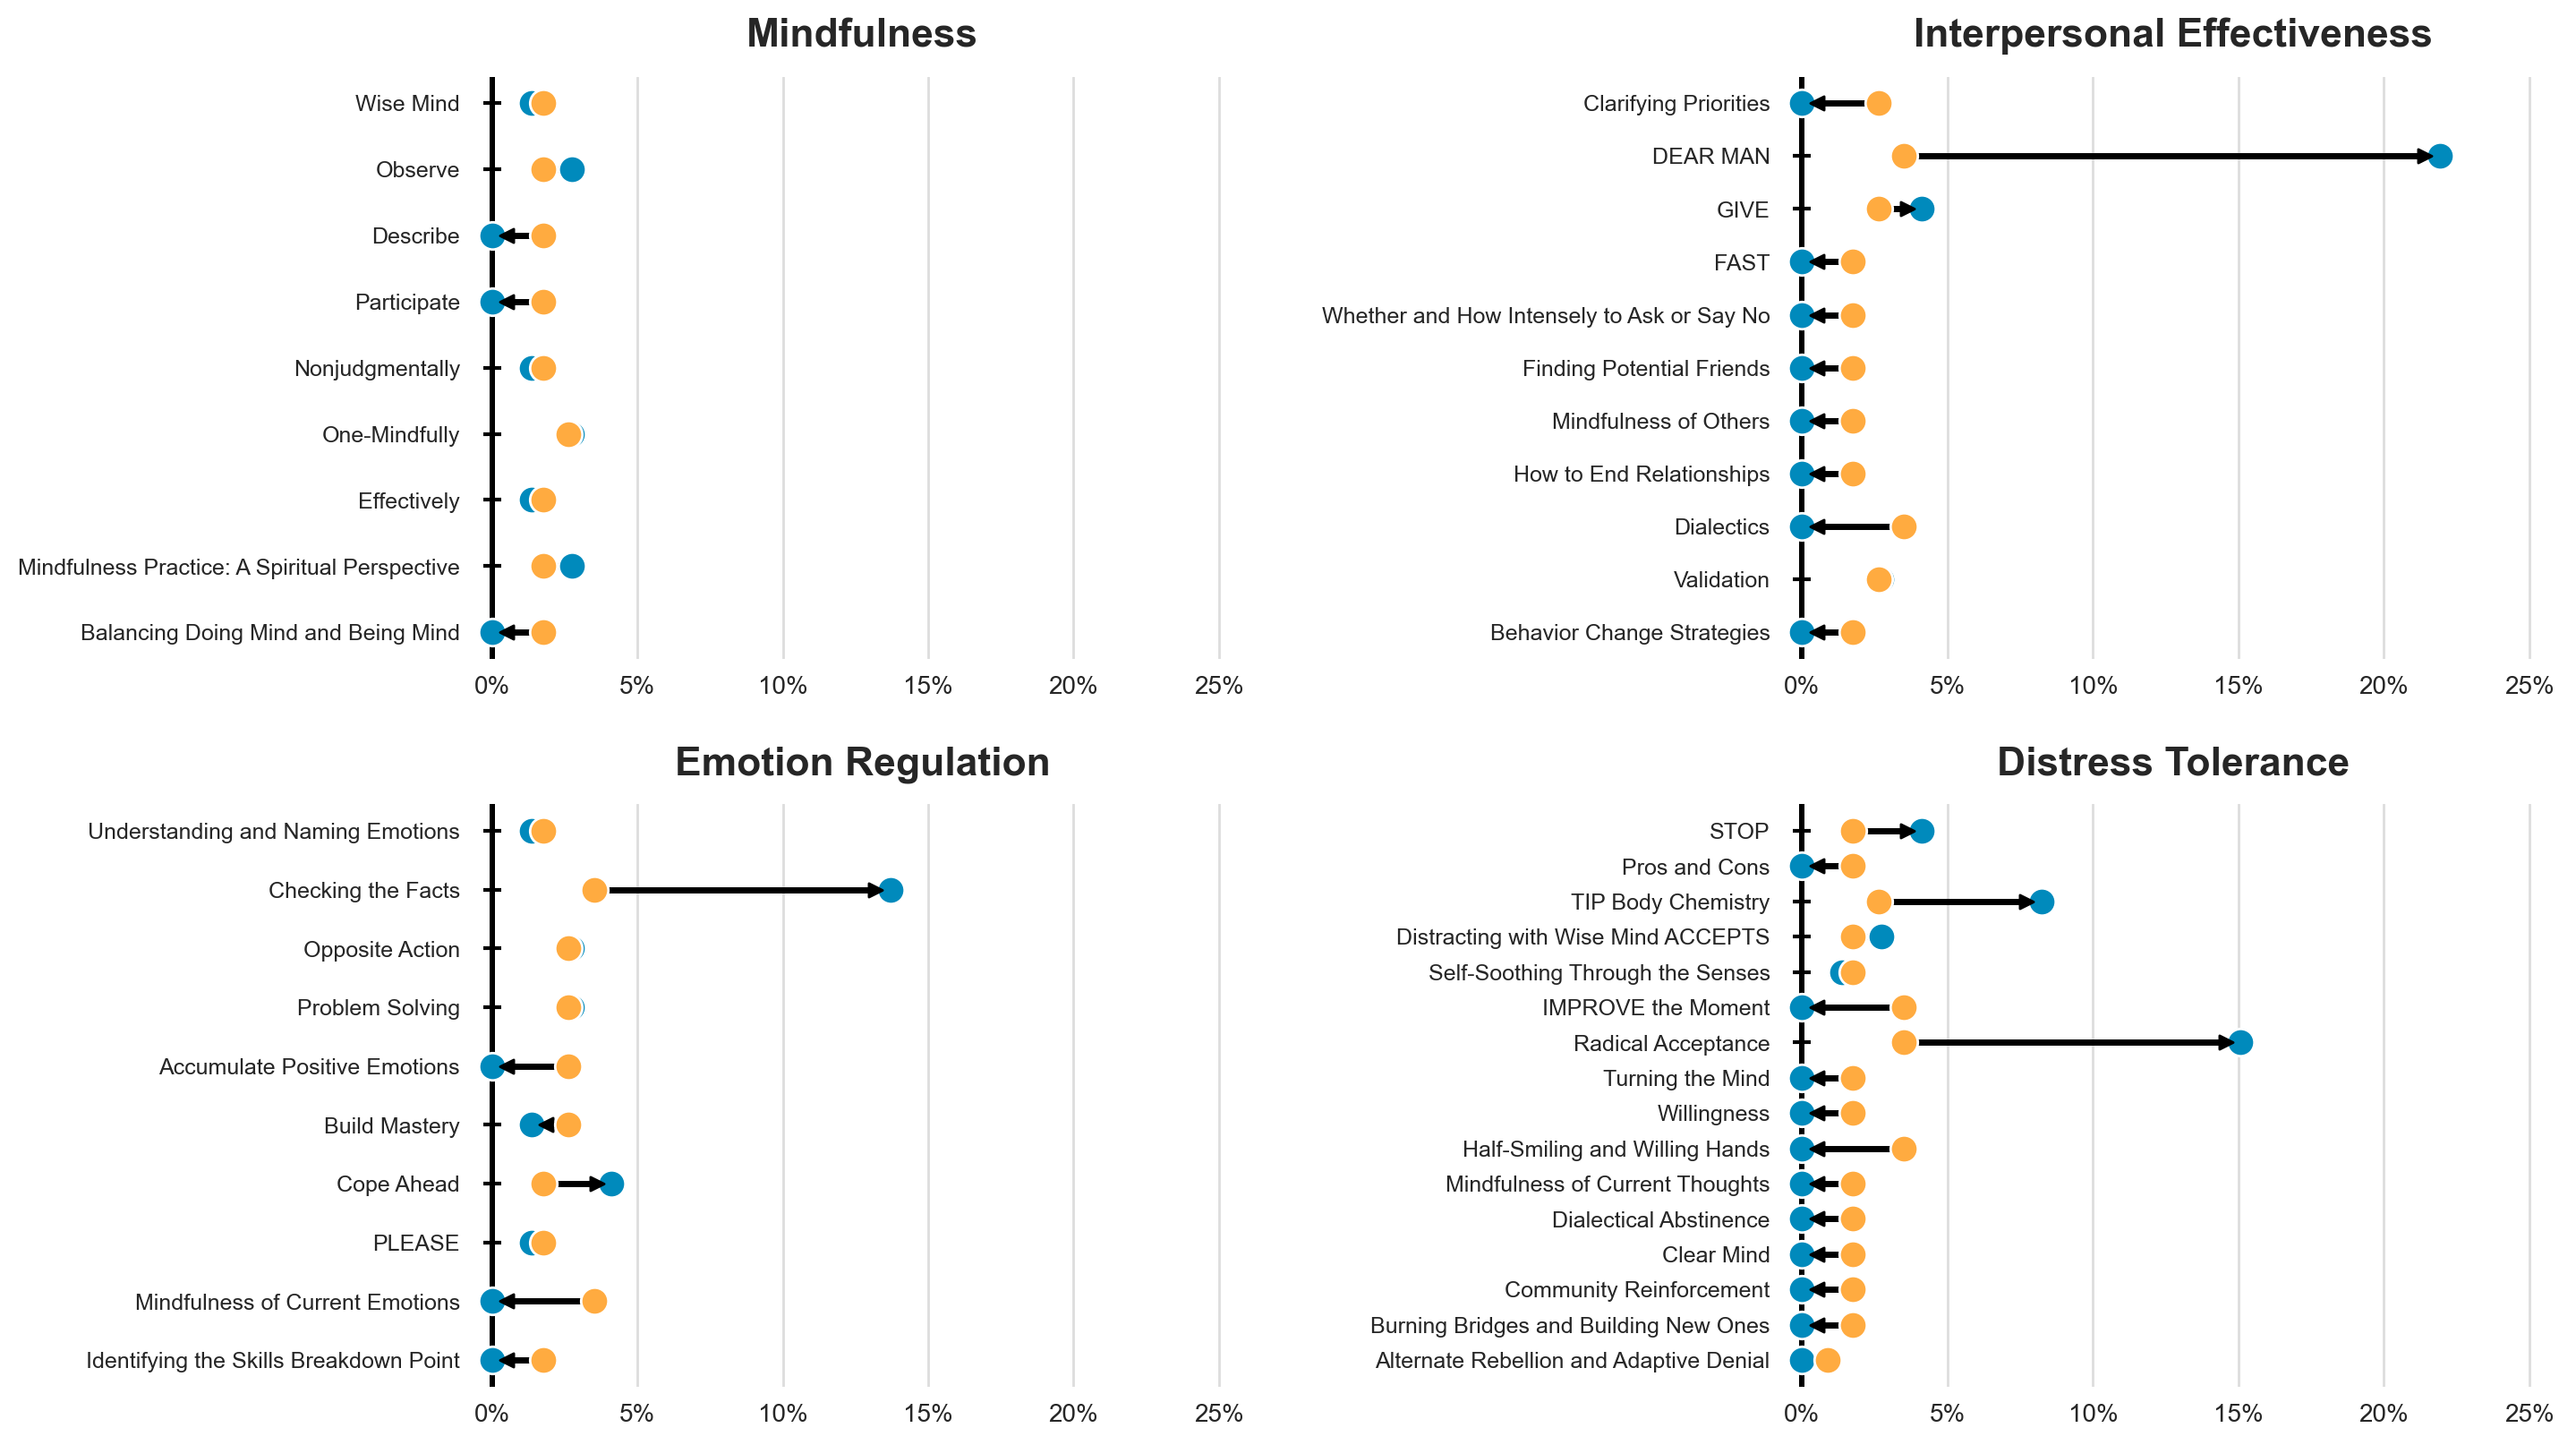

In [41]:
fig, axs = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(15,9.5),
    dpi=200,
)

for n, module in enumerate(skill_counts_df['module_name'].unique()):
    plt_df = skill_counts_df.query(f'module_name == \'{module}\'')
    axs.flat[n].scatter(
        x=plt_df['targeted'],
        y=range(len(plt_df)),
        c='#ffab40',
        s=120,
        edgecolors='w',
        linewidths=1,
        zorder=5,
    )
    axs.flat[n].scatter(
        x=plt_df['detected'],
        y=range(len(plt_df)),
        c='#008abc',
        s=120,
        edgecolors='w',
        linewidths=1,
        zorder=3,
    )

    for i in range(len(plt_df)):
        _vals = (plt_df['targeted'].iloc[i], plt_df['detected'].iloc[i])
        _xmin = min(_vals)
        _xmax = max(_vals)

        axs.flat[n].hlines(
            y = i,
            xmin = _xmin,
            xmax = _xmax,
            colors='black',
            lw=2.5,
            zorder=2,
        )
        # axs.flat[n].hlines(
        #     y = i,
        #     xmin = 0,
        #     xmax = _xmin,
        #     colors='#bbbbbb',
        #     lw=2,
        #     linestyles=':',
        #     zorder=2,
        # )
        axs.flat[n].scatter(
            x=0,
            y=i,
            c='black',
            s=50,
            marker='_',
            zorder=2,
        )
        axs.flat[n].axvline(
            x=0,
            c='black',
            lw=2,
            zorder=1
        )
        if abs(_vals[0] - _vals[1]) < 0.01:
            continue
        elif _vals[0] < _vals[1]:
            _marker = '>'
            _x = _vals[1] - 0.005
        else:
            _marker = '<'
            _x = _vals[1] + 0.005
        axs.flat[n].scatter(
            x=_x,
            y=i,
            c='black',
            s=30,
            marker=_marker,
            zorder=4,
        )


    axs.flat[n].set_title(f'{module}', fontsize=16, fontweight='bold', pad=12)
    axs.flat[n].grid(axis='x', linewidth=1, color='#dddddd')
    axs.flat[n].grid(axis='y', visible=False)

    axs.flat[n].set_xlim(-0.005,0.26)
    axs.flat[n].set_xticks([0., 0.05, 0.1, 0.15, 0.2, 0.25])
    axs.flat[n].set_xticklabels([f'{x:.0%}' for x in axs.flat[n].get_xticks()])
    plt.setp(axs.flat[n].get_xticklabels(), fontsize=10)

    axs.flat[n].set_yticks(range(len(plt_df)), plt_df['skill_name'])
    plt.setp(axs.flat[n].get_yticklabels(), fontsize=9)
    axs.flat[n].invert_yaxis()
    for place in ['left', 'right', 'top', 'bottom']:
        axs.flat[n].spines[place].set_visible(False)

fig.subplots_adjust(
    wspace=.7,
    hspace=.25,
)
plt.show()

In [21]:
module_counts_df = skill_counts_df.groupby(
    ['module_name']
)[['targeted', 'detected']].sum()
module_counts_df

,targeted,detected
module_name,,
Distress Tolerance,0.333333,0.315068
Emotion Regulation,0.245614,0.273973
Interpersonal Effectiveness,0.254386,0.287671
Mindfulness,0.166667,0.123288


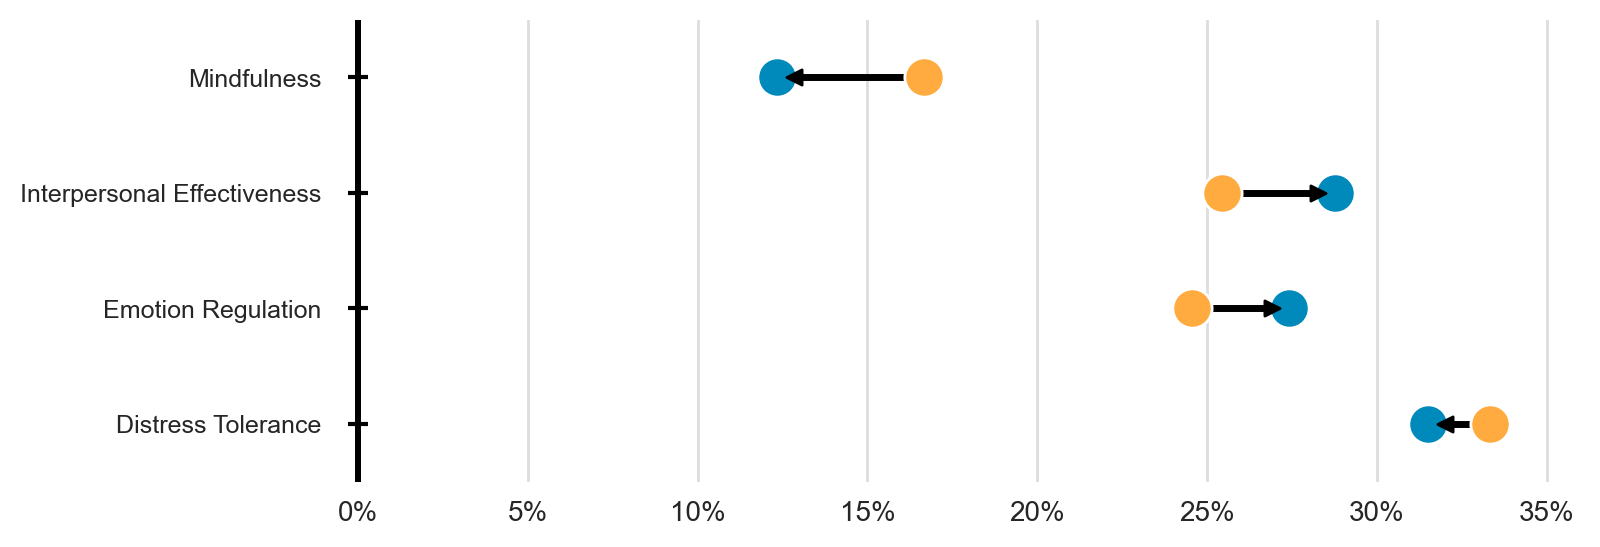

In [40]:
fig, ax = plt.subplots(
    figsize=(8,3),
    dpi=200,
)

plt_df = module_counts_df
module_names = ['Mindfulness', 'Interpersonal Effectiveness', 'Emotion Regulation', 'Distress Tolerance']

for i, module in enumerate(module_names):
    _vals = (plt_df['targeted'].loc[module], plt_df['detected'].loc[module])
    _xmin = min(_vals)
    _xmax = max(_vals)

    ax.scatter(
        x=_vals[0],
        y=i,
        c='#ffab40',
        s=200,
        edgecolors='w',
        linewidths=1,
        zorder=5,
    )
    ax.scatter(
        x=_vals[1],
        y=i,
        c='#008abc',
        s=200,
        edgecolors='w',
        linewidths=1,
        zorder=3,
    )
    ax.hlines(
        y = i,
        xmin = _xmin,
        xmax = _xmax,
        colors='black',
        lw=2.5,
        zorder=2,
    )
    # ax.hlines(
    #     y = i,
    #     xmin = 0,
    #     xmax = _xmin,
    #     colors='#bbbbbb',
    #     lw=2,
    #     linestyles=':',
    #     zorder=2,
    # )
    ax.scatter(
        x=0,
        y=i,
        c='black',
        s=50,
        marker='_',
        zorder=2,
    )
    ax.axvline(
        x=0,
        c='black',
        lw=2,
        zorder=1,
    )
    if abs(_vals[0] - _vals[1]) < 0.01:
        continue
    elif _vals[0] < _vals[1]:
        _marker = '>'
        _x = _vals[1] - 0.005
    else:
        _marker = '<'
        _x = _vals[1] + 0.005
    ax.scatter(
        x=_x,
        y=i,
        c='black',
        s=30,
        marker=_marker,
        zorder=4,
    )

# ax.set_title(f'All Modules', fontsize=16, fontweight='bold', pad=12)
ax.grid(axis='x', linewidth=1, color='#dddddd')
ax.grid(axis='y', visible=False)

ax.set_xlim(-0.005,0.36)
ax.set_xticks([0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35])
ax.set_xticklabels([f'{x:.0%}' for x in ax.get_xticks()])
plt.setp(ax.get_xticklabels(), fontsize=10)

ax.set_ylim(-0.5, len(module_names)-0.5)
ax.set_yticks(range(len(plt_df)), module_names)
plt.setp(ax.get_yticklabels(), fontsize=9)
ax.invert_yaxis()
for place in ['left', 'right', 'top', 'bottom']:
    ax.spines[place].set_visible(False)

In [39]:
module_proportions_arr = module_counts_df[['targeted', 'detected']].to_numpy()
( np.sum( ( ( module_proportions_arr[:,0] ** 0.5 ) - ( module_proportions_arr[:,1] ** 0.5 ) ) ** 2 ) ** 0.5 ) / (2 ** 0.5)

0.05156517227228039

#### Match Proportions

In [23]:
best_matches = []

for _i, row in skills_presence_df.iterrows():
    best_match_level = 'no_skill_detected'
    best_match_priority = 0

    for elem in itertools.product(row['target_skill_ids'], row['detected_skill_ids']):
        target_skill = dbt_skills.get_skill(elem[0])
        detected_skill = dbt_skills.get_skill(elem[1])
        match_level, match_priority = target_skill.get_hierarchy_match(detected_skill)
        if match_priority > best_match_priority:
            best_match_level = match_level
            best_match_priority = match_priority

    best_matches.append((best_match_level, best_match_priority))

best_matches

[('no_match', 1),
 ('no_skill_detected', 0),
 ('no_skill_detected', 0),
 ('module', 2),
 ('no_match', 1),
 ('module', 2),
 ('no_match', 1),
 ('no_match', 1),
 ('no_match', 1),
 ('no_match', 1),
 ('skill', 4),
 ('no_match', 1),
 ('no_match', 1),
 ('no_match', 1),
 ('no_match', 1),
 ('no_match', 1),
 ('module', 2),
 ('module', 2),
 ('no_skill_detected', 0),
 ('no_match', 1),
 ('category', 3),
 ('category', 3),
 ('skill', 4),
 ('no_match', 1),
 ('module', 2),
 ('module', 2),
 ('category', 3),
 ('no_match', 1),
 ('no_match', 1),
 ('skill', 4),
 ('no_match', 1),
 ('no_match', 1),
 ('no_match', 1),
 ('category', 3),
 ('category', 3),
 ('module', 2),
 ('module', 2),
 ('no_match', 1),
 ('no_match', 1),
 ('no_skill_detected', 0),
 ('module', 2),
 ('no_match', 1),
 ('no_match', 1),
 ('skill', 4),
 ('no_match', 1),
 ('no_skill_detected', 0),
 ('category', 3),
 ('skill', 4),
 ('module', 2),
 ('category', 3),
 ('no_match', 1),
 ('no_match', 1),
 ('no_skill_detected', 0),
 ('no_match', 1),
 ('module

In [24]:
best_matches_counter = Counter(best_matches)
best_matches_counter

Counter({('no_match', 1): 33,
         ('module', 2): 16,
         ('no_skill_detected', 0): 15,
         ('category', 3): 9,
         ('skill', 4): 8})

In [51]:
best_matches_cts = [best_matches_counter[key] for key in sorted(list(best_matches_counter.keys()), reverse=True, key=lambda x: x[1])]
best_matches_cts

[8, 9, 16, 33, 15]

In [52]:
np.cumsum(best_matches_cts)

array([ 8, 17, 33, 66, 81])